In [193]:
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt 
import seaborn as sns

In [194]:
# Открываем книги с данными
wb1 = xw.Book('D:/MinBatch/2022.xlsx')
wb2 = xw.Book('D:/MinBatch/2023.xlsx')
wb3 = xw.Book('D:/MinBatch/MinBatch.xlsx')

In [195]:
# Читаем книги
data_2022 = wb1.sheets['Лист1']
data_2023 = wb2.sheets['Лист1']
data_mb = wb3.sheets['Лист1']

Создаем Pandas фреймы, продажи за 3 месяца, включая исследуемый 22 год, 23 года, маску артикулов, отобранных для минимальной партии. Приводим данные к единообразию по типу. Артикул задаем как целое число

In [196]:
df_22 = data_2022.range('A1:I219739').options(pd.DataFrame, header = 1, index = False).value
df_22.head()

,Дата,Номер_документа,Код_клиента,Артикул,Кол-во,"ТО, руб.","ВД, руб.",КТН,АКБ
0,2022-08-01,1508125.0,2447820,465057,3.0,1181.07,200.08,1.203957,1.0
1,2022-08-01,1508156.0,2016843,1386333,10.0,3174.71,529.17,1.200023,1.0
2,2022-08-01,1508214.0,2829856,1008640,5.0,4795.02,800.04,1.200261,1.0
3,2022-08-01,1508331.0,872552,879389,1.0,416.24,69.37,1.199988,1.0
4,2022-08-01,1508348.0,2401895,731107,2.0,1523.23,149.14,1.108537,1.0


In [197]:
df_22['Артикул'] = pd.to_numeric(df_22['Артикул'])

In [198]:
df_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219738 entries, 0 to 219737
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Дата             219738 non-null  datetime64[ns]
 1   Номер_документа  219738 non-null  object        
 2   Код_клиента      219738 non-null  object        
 3   Артикул          219738 non-null  int64         
 4   Кол-во           219738 non-null  float64       
 5   ТО, руб.         219738 non-null  float64       
 6   ВД, руб.         219738 non-null  float64       
 7   КТН              219738 non-null  float64       
 8   АКБ              219738 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 15.1+ MB


In [199]:
df_23 = data_2023.range('A1:I291263').options(pd.DataFrame, header = 1, index = False).value
df_23.head()

,Дата,Номер_документа,Код_клиента,Артикул,Кол-во,"ТО, руб.","ВД, руб.",КТН,АКБ
0,2023-08-01,104590,2240637,1337441,-1.0,-4500.0,-1199.93,1.363607,1.0
1,2023-08-01,104604,3093185,1768656,-1.0,-325.0,-93.00,1.400862,1.0
2,2023-08-01,1046722,3190546,961020,1.0,1075.0,222.69,1.261278,1.0
3,2023-08-01,1046772,2725497,1659596,2.0,42.0,12.00,1.400000,1.0
4,2023-08-01,1046863,2253592,1306208,1.0,8692.0,439.00,1.053193,1.0


In [200]:
df_23['Артикул'] = pd.to_numeric(df_23['Артикул'])

In [201]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291262 entries, 0 to 291261
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Дата             291262 non-null  datetime64[ns]
 1   Номер_документа  291262 non-null  object        
 2   Код_клиента      291262 non-null  object        
 3   Артикул          291262 non-null  int64         
 4   Кол-во           291262 non-null  float64       
 5   ТО, руб.         291262 non-null  float64       
 6   ВД, руб.         291262 non-null  float64       
 7   КТН              291262 non-null  float64       
 8   АКБ              291262 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 20.0+ MB


In [202]:
df_mb = data_mb.range('A1:E349').options(pd.DataFrame, header = 1, index = False).value
df_mb.head()

,Артикул,Наименование,Финал Эксп. МП,ТК,АГ
0,15639.0,Лента тепл.регист. для ЭКГ SCHILLER АT-10 210х...,7.0,Бумага регистрирующая для мед. приборов,Бумага для импортных и отечественных ЭКГ
1,16335.0,Гель для ЭКГ УНИАГЕЛЬ 250г/бут.,2.0,Расходные материалы для диагностики,Контактные среды для исследований
2,29024.0,Лента тепл.регист. для ЭКГ NIHON KOHDEN 110х14...,6.0,Бумага регистрирующая для мед. приборов,Бумага для импортных и отечественных ЭКГ
3,46018.0,Гель для ЭКГ Жидкость электродная контактная с...,2.0,Расходные материалы для диагностики,Контактные среды для исследований
4,61043.0,Гель для ЭКГ УНИМАКС 250г/бут.,2.0,Расходные материалы для диагностики,Контактные среды для исследований


In [203]:
df_mb = df_mb.astype({'Артикул': 'Int64'})

In [204]:
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Артикул         348 non-null    Int64  
 1   Наименование    348 non-null    object 
 2   Финал Эксп. МП  348 non-null    float64
 3   ТК              348 non-null    object 
 4   АГ              348 non-null    object 
dtypes: Int64(1), float64(1), object(3)
memory usage: 14.1+ KB


Создаем выборку по продажам из артикулов, которые участвовали в расчете Минимальной партии. Формируем Датафреймы для 2022 и 2023 года

In [205]:
df_mb_22 = pd.merge(df_22, df_mb, on=['Артикул'], how='inner')
df_mb_22.head(3)

,Дата,Номер_документа,Код_клиента,Артикул,Кол-во,"ТО, руб.","ВД, руб.",КТН,АКБ,Наименование,Финал Эксп. МП,ТК,АГ
0,2022-08-01,1508375.0,3046902,1003292,20.0,195.58,9.20,1.049362,1.0,"Перевяз. ср-ва Бинт эластичный трубчатый, разм...",10.0,Перевязочные средства,Бинты фиксирующие
1,2022-08-01,39677172,921727,1003292,5.0,48.51,1.91,1.040987,1.0,"Перевяз. ср-ва Бинт эластичный трубчатый, разм...",10.0,Перевязочные средства,Бинты фиксирующие
2,2022-08-03,1509816,3046902,1003292,21.0,205.36,9.58,1.048932,1.0,"Перевяз. ср-ва Бинт эластичный трубчатый, разм...",10.0,Перевязочные средства,Бинты фиксирующие


In [206]:
df_mb_22.shape

(26128, 13)

Удалим возвраты, в анализе минимальных партий они нам не нужны

In [207]:
df_mb_22 = df_mb_22[(df_mb_22['Кол-во'] > 0)]

In [208]:
df_mb_22.describe()

,Артикул,Кол-во,"ТО, руб.","ВД, руб.",КТН,АКБ,Финал Эксп. МП
count,2.522900e+04,25229.000000,25229.000000,25229.000000,25229.000000,25229.0,25229.000000
mean,8.001837e+05,25.723572,908.263166,289.759807,1.742715,1.0,6.046137
std,3.471267e+05,96.355363,2610.353557,970.428346,0.662860,0.0,6.103737
min,1.633500e+04,1.000000,1.360000,-71061.200000,0.115067,1.0,2.000000
25%,5.217240e+05,2.000000,96.000000,32.330000,1.320003,1.0,3.000000
50%,7.725480e+05,6.000000,270.000000,88.450000,1.561130,1.0,5.000000
75%,9.956380e+05,20.000000,790.790000,252.060000,1.960513,1.0,5.000000
max,1.669949e+06,7000.000000,129880.000000,30722.700000,5.005409,1.0,100.000000


In [209]:
df_mb_23 = pd.merge(df_23, df_mb, on=['Артикул'], how='inner')
df_mb_23.head(3)

,Дата,Номер_документа,Код_клиента,Артикул,Кол-во,"ТО, руб.","ВД, руб.",КТН,АКБ,Наименование,Финал Эксп. МП,ТК,АГ
0,2023-08-01,16393008,72006,850682,2.0,324.0,83.99,1.349944,1.0,"Антисептик кожный Альтсепт 200 мл, спрей",2.0,Дезинфицирующие средства,Антисептики кожные
1,2023-08-01,16394044,102018,850682,2.0,264.0,23.99,1.099954,1.0,"Антисептик кожный Альтсепт 200 мл, спрей",2.0,Дезинфицирующие средства,Антисептики кожные
2,2023-08-01,45413960,2626543,850682,2.0,324.0,83.99,1.349944,1.0,"Антисептик кожный Альтсепт 200 мл, спрей",2.0,Дезинфицирующие средства,Антисептики кожные


In [210]:
df_mb_23.shape

(30859, 13)

In [211]:
# Удаляем возвраты
df_mb_23 = df_mb_23[(df_mb_23['Кол-во'] > 0)]

In [212]:
df_mb_23.describe()

,Артикул,Кол-во,"ТО, руб.","ВД, руб.",КТН,АКБ,Финал Эксп. МП
count,2.950100e+04,29501.000000,29501.000000,29501.000000,29501.000000,29501.0,29501.000000
mean,8.509470e+05,25.629674,910.499255,331.982251,1.797019,1.0,5.564015
std,3.831607e+05,102.040069,3061.658860,1028.700302,0.475013,0.0,5.812594
min,1.563900e+04,1.000000,1.580000,-1234.660000,0.794260,1.0,2.000000
25%,5.217240e+05,2.000000,97.200000,37.510000,1.400058,1.0,2.000000
50%,8.324910e+05,6.000000,256.080000,100.690000,1.680791,1.0,5.000000
75%,9.971730e+05,20.000000,736.000000,272.350000,2.118921,1.0,5.000000
max,1.674213e+06,6000.000000,204885.730000,61418.160000,10.247917,1.0,100.000000


Проведем анализ на выбросы, примем решение о наличии их в датасете для исследования минимальной партии. 

c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


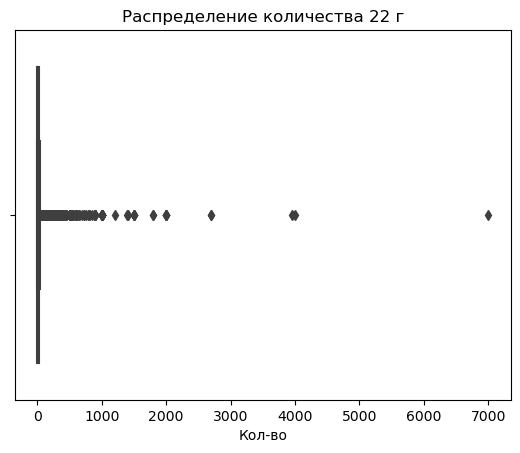

In [213]:
sns.boxplot(df_mb_22['Кол-во'])
plt.title('Распределение количества 22 г');

In [214]:
len(df_mb_22[(df_mb_22['Кол-во'] > 100)])

959

c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


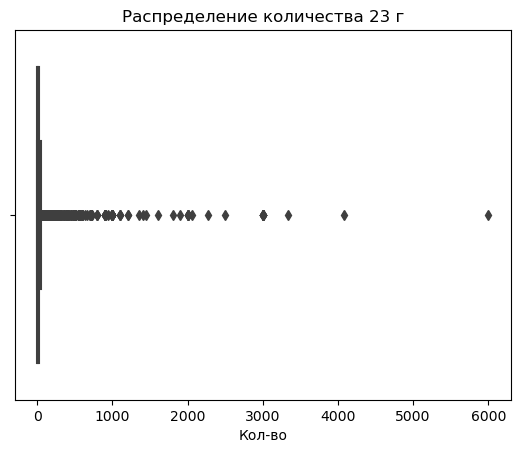

In [215]:
sns.boxplot(df_mb_23['Кол-во'])
plt.title('Распределение количества 23 г');

In [216]:
len(df_mb_23[(df_mb_23['Кол-во'] > 100)])

1010

Количество выбросов в сравнении LFL сопоставимое. Оставим их для оценки общих экономических показателей продаж

Рассчитаем таварооборот, валовый доход, ктн, АКБ помесячно по 22 и 23 году. Для автоматизации отчета в следующих периодах присовим имена переменным, исходя из следующей логики:
- индекс 0 - результаты исследуемого месяца
- индекс 1 - результаты за месяц до исследуемого месяца
- индекс 2 - результаты за два месяца до исследуемого месяца

Соберем результаты в отдельный Датафрейм по 22 году

In [217]:
TO_22_0 = df_mb_22[df_mb_22['Дата'].dt.month == 10]['ТО, руб.'].sum()
TO_22_1 = df_mb_22[df_mb_22['Дата'].dt.month == 9]['ТО, руб.'].sum()
TO_22_2 = df_mb_22[df_mb_22['Дата'].dt.month == 8]['ТО, руб.'].sum()

In [218]:
RV_22_0 = df_mb_22[df_mb_22['Дата'].dt.month == 10]['ВД, руб.'].sum()
RV_22_1 = df_mb_22[df_mb_22['Дата'].dt.month == 9]['ВД, руб.'].sum()
RV_22_2 = df_mb_22[df_mb_22['Дата'].dt.month == 8]['ВД, руб.'].sum()

In [219]:
KTN_22_0 = TO_22_0/(TO_22_0 - RV_22_0)
KTN_22_1 = TO_22_1/(TO_22_1 - RV_22_1)
KTN_22_2 = TO_22_2/(TO_22_2 - RV_22_2)

In [220]:
acb_22_0 = df_mb_22[df_mb_22['Дата'].dt.month == 10]['Код_клиента'].nunique()
acb_22_1 = df_mb_22[df_mb_22['Дата'].dt.month == 9]['Код_клиента'].nunique()
acb_22_2 = df_mb_22[df_mb_22['Дата'].dt.month == 8]['Код_клиента'].nunique()

In [221]:
result_22 = pd.DataFrame(columns=["Месяц", "ТО_руб", "ВД_руб", "КТН", "АКБ"])

In [222]:
result_22.loc[len(result_22)]=['2', TO_22_2, RV_22_2, KTN_22_2, acb_22_2]
result_22.loc[len(result_22)]=['1', TO_22_1, RV_22_1, KTN_22_1, acb_22_1]
result_22.loc[len(result_22)]=['0', TO_22_0, RV_22_0, KTN_22_0, acb_22_0]


In [223]:
result_22['Прирост ТО к пред. месяцу'] = result_22['ТО_руб'].pct_change()

In [224]:
result_22.head()

,Месяц,ТО_руб,ВД_руб,КТН,АКБ,Прирост ТО к пред. месяцу
0,2,6806072.11,2084486.69,1.441480,3786,NaN
1,1,7727242.11,2400308.94,1.450599,4203,0.135345
2,0,8381257.19,2825554.53,1.508586,4145,0.084638


Соберем результаты в отдельный Датафрейм по 23 году

In [225]:
TO_23_0 = df_mb_23[df_mb_23['Дата'].dt.month == 10]['ТО, руб.'].sum()
TO_23_1 = df_mb_23[df_mb_23['Дата'].dt.month == 9]['ТО, руб.'].sum()
TO_23_2 = df_mb_23[df_mb_23['Дата'].dt.month == 8]['ТО, руб.'].sum()

In [226]:
RV_23_0 = df_mb_23[df_mb_23['Дата'].dt.month == 10]['ВД, руб.'].sum()
RV_23_1 = df_mb_23[df_mb_23['Дата'].dt.month == 9]['ВД, руб.'].sum()
RV_23_2 = df_mb_23[df_mb_23['Дата'].dt.month == 8]['ВД, руб.'].sum()


In [227]:
KTN_23_0 = TO_23_0/(TO_23_0 - RV_23_0)
KTN_23_1 = TO_23_1/(TO_23_1 - RV_23_1)
KTN_23_2 = TO_23_2/(TO_23_2 - RV_23_2)

In [228]:
acb_23_0 = df_mb_23[df_mb_23['Дата'].dt.month == 10]['Код_клиента'].nunique()
acb_23_1 = df_mb_23[df_mb_23['Дата'].dt.month == 9]['Код_клиента'].nunique()
acb_23_2 = df_mb_23[df_mb_23['Дата'].dt.month == 8]['Код_клиента'].nunique()

In [229]:
result_23 = pd.DataFrame(columns=["Месяц", "ТО_руб", "ВД_руб", "КТН", "АКБ"])

In [230]:
result_23.loc[len(result_23)]=['2', TO_23_2, RV_23_2, KTN_23_2, acb_23_2]
result_23.loc[len(result_23)]=['1', TO_23_1, RV_23_1, KTN_23_1, acb_23_1]
result_23.loc[len(result_23)]=['0', TO_23_0, RV_23_0, KTN_23_0, acb_23_0]

Рассчитаем прирост ТО к предыдущему месяцу

In [231]:
result_23['Прирост ТО к пред. месяцу'] = result_23['ТО_руб'].pct_change()

Посчитаем прирост LFL для каждого месяца

In [232]:
result_23['Прирост LFL'] = (result_23['ТО_руб'] / result_22['ТО_руб']) - 1

In [233]:
result_23.head()

,Месяц,ТО_руб,ВД_руб,КТН,АКБ,Прирост ТО к пред. месяцу,Прирост LFL
0,2,8339853.33,3004908.99,1.563250,4636,NaN,0.225355
1,1,9011455.54,3332982.19,1.586950,4767,0.080529,0.166193
2,0,9509329.64,3455917.22,1.570904,4495,0.055249,0.134595


Сравним прирост LFL выборки с приростом LFL по всему каналу продаж ИМК

In [234]:
print(f" прирост 2 -  {(df_23[df_23['Дата'].dt.month == 8]['ТО, руб.'].sum()/df_22[df_22['Дата'].dt.month == 8]['ТО, руб.'].sum())-1}")
print(f" прирост 1 -  {(df_23[df_23['Дата'].dt.month == 9]['ТО, руб.'].sum()/df_22[df_22['Дата'].dt.month == 9]['ТО, руб.'].sum())-1}")
print(f" прирост 0 -  {(df_23[df_23['Дата'].dt.month == 10]['ТО, руб.'].sum()/df_22[df_22['Дата'].dt.month == 10]['ТО, руб.'].sum())-1}")


 прирост 2 -  0.13616922406943277
 прирост 1 -  0.18072830624373482
 прирост 0 -  0.39354905244100036


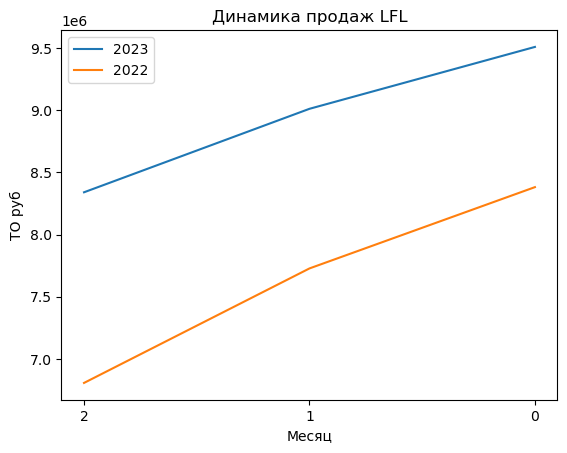

In [235]:
plt.plot(result_23['Месяц'], result_23['ТО_руб'], label ='2023')
plt.plot(result_22['Месяц'], result_22['ТО_руб'], label ='2022' )

plt.legend()
plt.xlabel('Месяц')
plt.ylabel('ТО руб')
plt.title('Динамика продаж LFL')
plt.show()

Рассчитаем статистические показатели для Количества каждой продажи помесячно по 22 году 

In [236]:
mode_22_0 = df_mb_22[df_mb_22['Дата'].dt.month == 10]['Кол-во'].mode()
mode_22_1 = df_mb_22[df_mb_22['Дата'].dt.month == 9]['Кол-во'].mode()
mode_22_2 = df_mb_22[df_mb_22['Дата'].dt.month == 8]['Кол-во'].mode()

In [237]:
mean_22_0 = df_mb_22[df_mb_22['Дата'].dt.month == 10]['Кол-во'].mean()
mean_22_1 = df_mb_22[df_mb_22['Дата'].dt.month == 9]['Кол-во'].mean()
mean_22_2 = df_mb_22[df_mb_22['Дата'].dt.month == 8]['Кол-во'].mean()

In [238]:
median_22_0 = df_mb_22[df_mb_22['Дата'].dt.month == 10]['Кол-во'].median()
median_22_1 = df_mb_22[df_mb_22['Дата'].dt.month == 9]['Кол-во'].median()
median_22_2 = df_mb_22[df_mb_22['Дата'].dt.month == 8]['Кол-во'].median()

In [245]:
df_mb_22[df_mb_22['Дата'].dt.month == 10]['Кол-во'].describe()

count    8664.000000
mean       25.587258
std        90.461232
min         1.000000
25%         2.000000
50%         6.000000
75%        20.000000
max      4000.000000
Name: Кол-во, dtype: float64

In [246]:
df_mb_22[df_mb_22['Дата'].dt.month == 9]['Кол-во'].describe()

count    8602.000000
mean       26.521390
std       108.685052
min         1.000000
25%         2.000000
50%         6.000000
75%        20.000000
max      7000.000000
Name: Кол-во, dtype: float64

In [247]:
df_mb_22[df_mb_22['Дата'].dt.month == 8]['Кол-во'].describe()

count    7963.000000
mean       25.010046
std        88.048622
min         1.000000
25%         2.000000
50%         6.000000
75%        20.000000
max      3948.000000
Name: Кол-во, dtype: float64

Соберем результаты для 22 г  в Датасет 

In [248]:
stats_22 = pd.DataFrame(columns=["Месяц","Мода", "Среднее", "Медиана"]) 

In [249]:
stats_22.loc[len(stats_22)]=['2', mode_22_2, mean_22_2, median_22_2 ]
stats_22.loc[len(stats_22)]=['1', mode_22_1, mean_22_1, median_22_1 ]
stats_22.loc[len(stats_22)]=['0', mode_22_0, mean_22_0, median_22_0 ]
stats_22.head()

,Месяц,Мода,Среднее,Медиана
0,2,"0 1.0 Name: Кол-во, dtype: float64",25.010046,6.0
1,1,"0 1.0 Name: Кол-во, dtype: float64",26.521390,6.0
2,0,"0 1.0 Name: Кол-во, dtype: float64",25.587258,6.0


Те же метрики рассчитываем для 23 года

In [250]:
mode_23_0 = df_mb_23[df_mb_23['Дата'].dt.month == 10]['Кол-во'].mode()
mode_23_1 = df_mb_23[df_mb_23['Дата'].dt.month == 9]['Кол-во'].mode()
mode_23_2 = df_mb_23[df_mb_23['Дата'].dt.month == 8]['Кол-во'].mode()


In [251]:
mean_23_0 = df_mb_23[df_mb_23['Дата'].dt.month == 10]['Кол-во'].mean()
mean_23_1 = df_mb_23[df_mb_23['Дата'].dt.month == 9]['Кол-во'].mean()
mean_23_2 = df_mb_23[df_mb_23['Дата'].dt.month == 8]['Кол-во'].mean()

In [252]:
median_23_0 = df_mb_23[df_mb_23['Дата'].dt.month == 10]['Кол-во'].median()
median_23_1 = df_mb_23[df_mb_23['Дата'].dt.month == 9]['Кол-во'].median()
median_23_2 = df_mb_23[df_mb_23['Дата'].dt.month == 8]['Кол-во'].median()

In [253]:
df_mb_23[df_mb_23['Дата'].dt.month == 10]['Кол-во'].describe()

count    9838.000000
mean       26.890527
std       107.176059
min         1.000000
25%         3.000000
50%         8.000000
75%        20.000000
max      6000.000000
Name: Кол-во, dtype: float64

In [254]:
df_mb_23[df_mb_23['Дата'].dt.month == 9]['Кол-во'].describe()

count    9779.000000
mean       24.968708
std       104.039878
min         1.000000
25%         2.000000
50%         5.000000
75%        20.000000
max      3335.000000
Name: Кол-во, dtype: float64

In [255]:
df_mb_23[df_mb_23['Дата'].dt.month == 8]['Кол-во'].describe()

count    9884.000000
mean       25.028632
std        94.523195
min         1.000000
25%         2.000000
50%         5.000000
75%        20.000000
max      4081.000000
Name: Кол-во, dtype: float64

Соберем результаты для 23 г  в Датасет

In [256]:
stats_23 = pd.DataFrame(columns=["Месяц","Мода", "Среднее", "Медиана"]) 

In [257]:
stats_23.loc[len(stats_23)]=['2', mode_23_2, mean_23_2, median_23_2 ]
stats_23.loc[len(stats_23)]=['1', mode_23_1, mean_23_1, median_23_1 ]
stats_23.loc[len(stats_23)]=['0', mode_23_0, mean_23_0, median_23_0 ]
stats_23.head()

,Месяц,Мода,Среднее,Медиана
0,2,"0 1.0 Name: Кол-во, dtype: float64",25.028632,5.0
1,1,"0 1.0 Name: Кол-во, dtype: float64",24.968708,5.0
2,0,"0 10.0 Name: Кол-во, dtype: float64",26.890527,8.0


In [259]:
# Мода по установленным минимальным партиям в наложении на продажи 10 месяца. Текущая Мода продаж в 2 раза выше
mode_mb_0 = df_mb_23[df_mb_23['Дата'].dt.month == 10]['Финал Эксп. МП'].mode()
mode_mb_0

0    5.0
Name: Финал Эксп. МП, dtype: float64

Создадим сводную таблицу для анализа продаж поартикульно

In [285]:
df_mb_23.columns

Index(['Дата', 'Номер_документа', 'Код_клиента', 'Артикул', 'Кол-во',
       'ТО, руб.', 'ВД, руб.', 'КТН', 'АКБ', 'Наименование', 'Финал Эксп. МП',
       'ТК', 'АГ'],
      dtype='object')

In [265]:
import numpy as np

In [300]:
pv_mb_23 = pd.pivot_table(df_mb_23, index = ['Артикул', 'Наименование', 'ТК', 'АГ', 'Финал Эксп. МП'],
                                    columns=[df_mb_23['Дата'].dt.month],
                                    values=['Кол-во', 'ТО, руб.','Код_клиента','Номер_документа' ],
                                    aggfunc= {'Кол-во':[np.sum, np.mean, np.median],'ТО, руб.':[np.sum], 'Код_клиента':[pd.Series.nunique],  'Номер_документа':[pd.Series.nunique]},
               fill_value=0)


In [301]:
pv_mb_23.head()

Код_клиента  \
                                                                                                                                                               nunique   
Дата                                                                                                                                                                8    
Артикул Наименование                                       ТК                                      АГ                                       Финал Эксп. МП               
15639   Лента тепл.регист. для ЭКГ SCHILLER АT-10 210х1... Бумага регистрирующая для мед. приборов Бумага для импортных и отечественных ЭКГ 7.0                      5   
16335   Гель для ЭКГ УНИАГЕЛЬ 250г/бут.                    Расходные материалы для диагностики     Контактные среды для исследований        2.0                     13   
29024   Лента тепл.регист. для ЭКГ NIHON KOHDEN 110х140... Бумага регистрирующая для мед. приборов Бумага для импортных и отечественных ЭКГ 6.0                      3   
46018   Гель для ЭКГ Жидкость электродная контактная с ... Расходные материалы для диагностики     Контактные среды для исследований        2.0                     40   
61043   Гель для ЭКГ УНИМАКС 250г/бут.                     Расходные материалы для диагностики     Контактные среды для исследований        2.0                      5   

                                                                                                                                                                \
                                                                                                                                                                 
Дата                                                                                                                                                        9    
Артикул Наименование                                       ТК                                      АГ                                       Финал Эксп. МП       
15639   Лента тепл.регист. для ЭКГ SCHILLER АT-10 210х1... Бумага регистрирующая для мед. приборов Бумага для импортных и отечественных ЭКГ 7.0              3   
16335   Гель для ЭКГ УНИАГЕЛЬ 250г/бут.                    Расходные материалы для диагностики     Контактные среды для исследований        2.0             10   
29024   Лента тепл.регист. для ЭКГ NIHON KOHDEN 110х140... Бумага регистрирующая для мед. приборов Бумага для импортных и отечественных ЭКГ 6.0              6   
46018   Гель для ЭКГ Жидкость электродная контактная с ... Расходные материалы для диагностики     Контактные среды для исследований        2.0             35   
61043   Гель для ЭКГ УНИМАКС 250г/бут.                     Расходные материалы для диагностики     Контактные среды для исследований        2.0              9   

                                                                                                                                                                \
                                                                                                                                                                 
Дата                                                                                                                                                        10   
Артикул Наименование                                       ТК                                      АГ                                       Финал Эксп. МП       
15639   Лента тепл.регист. для ЭКГ SCHILLER АT-10 210х1... Бумага регистрирующая для мед. приборов Бумага для импортных и отечественных ЭКГ 7.0              8   
16335   Гель для ЭКГ УНИАГЕЛЬ 250г/бут.                    Расходные материалы для диагностики     Контактные среды для исследований        2.0             14   
29024   Лента тепл.регист. для ЭКГ NIHON KOHDEN 110х140... Бумага регистрирующая для мед. приборов Бумага для импортных и отечественных ЭКГ 6.0              4   
46018   Гель для ЭКГ Жидкость э

In [304]:
pv_mb_23.to_excel('mb_23.xlsx', index = True)

### Отчет Минимальные Партии
Описание задачи: 20.10.23 Была прогружена минимальная партия на тестовую выборку артикулов для канала ИМК.
Минимальная партия устанавливалась для позиций, на которые расчетные затраты при покупке одной единицы товара   ниже точки безубыточности. 
Предполагается, что с введением инструмента Минимальной партии логистические затраты на обработку строк мелкоштучного, дешевого  товара снизятся, что положительно скажется на показателе чистой прибыли.

Реализация отчета: Данное исследование было реализовано в разрезе управленческого учета, базируясь на  показателях: Товарооборот, Валовая Прибыль, АКБ, Количество заказов, без учета рассчетных показателей затрат на обработку единичных логистических строк. Для анализа взяты данные по продажам по каналу продаж ИМК (ДКРП + СДКМ)

Этапы реализации:
- К сровнению принимались 2 периода: LFL и 2 месяца, предшествующих исследуемуму. 
- Сформирована выборка позиций, для которых прогружена минимальная партия. 
- Для исследуемых периодов рассчитаны показатели ТО, ВД, КТН, АКБ, Приросты по ТО к предыдущему месяцу и LFL

Продажи выборка "Артикулы с МП" 2022 год. 2-авг, 1-сент, 0-окт
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Месяц</th>
      <th>ТО_руб</th>
      <th>ВД_руб</th>
      <th>КТН</th>
      <th>АКБ</th>
      <th>Прирост ТО к пред. месяцу</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2</td>
      <td>6806072.11</td>
      <td>2084486.69</td>
      <td>1.441480</td>
      <td>3786</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>7727242.11</td>
      <td>2400308.94</td>
      <td>1.450599</td>
      <td>4203</td>
      <td>0.135345</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>8381257.19</td>
      <td>2825554.53</td>
      <td>1.508586</td>
      <td>4145</td>
      <td>0.084638</td>
    </tr>
  </tbody>
</table>
</div>

Продажи выборка "Артикулы с МП" 2023 год. 2-авг, 1-сент, 0-окт
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Месяц</th>
      <th>ТО_руб</th>
      <th>ВД_руб</th>
      <th>КТН</th>
      <th>АКБ</th>
      <th>Прирост ТО к пред. месяцу</th>
      <th>Прирост LFL</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2</td>
      <td>8339853.33</td>
      <td>3004908.99</td>
      <td>1.563250</td>
      <td>4636</td>
      <td>NaN</td>
      <td>0.225355</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>9011455.54</td>
      <td>3332982.19</td>
      <td>1.586950</td>
      <td>4767</td>
      <td>0.080529</td>
      <td>0.166193</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>9509329.64</td>
      <td>3455917.22</td>
      <td>1.570904</td>
      <td>4495</td>
      <td>0.055249</td>
      <td>0.134595</td>
    </tr>
  </tbody>
</table>
</div>

- Выборка проанализирована на выбросы по плотности распределения продаж. Для текущего отчета принято решение оставить экстримальные значения, так как они составляют порядка ~ 10% данных. С увеличением времени эксперемента можно вернуться к рассмотрению варианта очистки данных. 

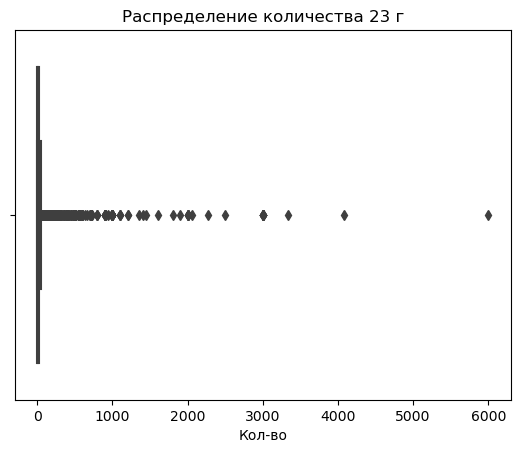

- Рассчитаны статистические показатели для Количества позиций в разрезе месяцев: Мода (наиболее часто встречающееся значение), Среднее, Медиана (показатель центральной тенденции выборки, ранжированной по возрастанию)

- Сформирована сводная таблица Excel для поартикульного анализа в разрезе ТК,АГ

Выводы: 
- Динамика роста ТО в выборке "Артикулы с МП" сохраняется. Это отчетливо видно на приведенном ниже графике: линии роста ТО практически параллельны

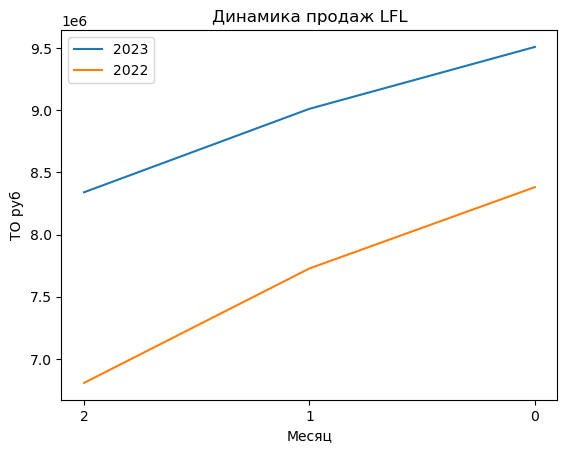

- Так же, как и в прошлом году в октябре наблюдается снижение АКБ. Расценивать снижение, как негативный фактор ввода минимальной партии на данном временном отрезке не можем. Необходимо рассматривать более длительные временные отрезки.
- Показательным позитивным фактором является рост в октябре 2023 г статистических показателей Количества шт позиций в заказе: 

Статистические показатели Количества выборка "Артикулы с МП" 2022 г
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Месяц</th>
      <th>Мода</th>
      <th>Среднее</th>
      <th>Медиана</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2</td>
      <td>1.0</td>
      <td>25.010046</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1.0</td>
      <td>26.521390</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>1.0</td>
      <td>25.587258</td>
      <td>6.0</td>
    </tr>
  </tbody>
</table>
</div>

Статистические показатели выборка "Артикулы с МП" Количества 2023 г

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Месяц</th>
      <th>Мода</th>
      <th>Среднее</th>
      <th>Медиана</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2</td>
      <td>1.0</td>
      <td>25.028632</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1.0</td>
      <td>24.968708</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>10.0</td>
      <td>26.890527</td>
      <td>8.0</td>
    </tr>
  </tbody>
</table>
</div>

Рост показателей Моды, Среднего и Медианы, стремление значения Медианы к Моде, сохранение динамики роста ТО, явно указывает на то, что МП работает. 
Очивидно, что на отрезке 10 дней выводы делать рано, необходимо анализировать проект на более длительных временных отрезках. 

Также необходимо доказать нулевую гипотезу: " С вводом Минимальной партии Товарооборот не снижается, отток клиентов не происходит"

Доказательство либо опровержение нулевой гипотезы станет возможным при исследовании данных в разрезе трех месяцев эксперимента. 

Также необходими оценка изменения Логистических Затрат и анализ Чистой прибыли
